In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
digits=datasets.load_digits()

In [4]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
X=digits.data
X.shape

(1797, 64)

In [9]:
y=digits.target
y.shape

(1797,)

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
some_digit=X[666]
some_digit

array([ 0.,  0.,  5., 15., 14.,  3.,  0.,  0.,  0.,  0., 13., 15.,  9.,
       15.,  2.,  0.,  0.,  4., 16., 12.,  0., 10.,  6.,  0.,  0.,  8.,
       16.,  9.,  0.,  8., 10.,  0.,  0.,  7., 15.,  5.,  0., 12., 11.,
        0.,  0.,  7., 13.,  0.,  5., 16.,  6.,  0.,  0.,  0., 16., 12.,
       15., 13.,  1.,  0.,  0.,  0.,  6., 16., 12.,  2.,  0.,  0.])

In [15]:
y[666]

0

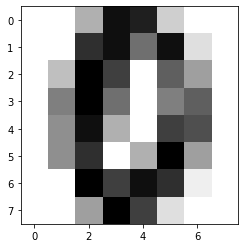

In [20]:
some_digit_image=some_digit.reshape(8,8)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary)
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [56]:
my_knn_clf=KNeighborsClassifier(n_neighbors=3)

In [57]:
my_knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_predict=my_knn_clf.predict(X_test)

scikit-learin中的accuracy_score

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9833333333333333

In [60]:
#直接得到accuracy,不用先得到y_predict
my_knn_clf.score(X_test,y_test)

0.9833333333333333

<font color=black size=5 face=雅黑>**参数**</font>

超参数：在运行机器学习算法之前需要指定的参数

模型参数：算法过程中学习的参数

KNN算法没有模型参数

KNN算法中的k是典型的超参数

寻找好的超参数：
1. 领域知识
2. 经验数值（默认值）
3. 实验搜索

In [68]:
#寻找最好的K 
best_score=0.0
best_k= -1
for k in range(3,11):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train,y_train)
    score=knn_clf.score(X_test,y_test)
    if score>best_score:
        best_k=k
        best_score=score

print("best_k =",best_k)
print("best_score=",best_score)

best_k = 3
best_score= 0.9833333333333333


In [67]:
#考虑距离？不考虑距离？
best_method=""
best_score=0.0
best_k= -1
for method in ['uniform','distance']:
    for k in range(3,11):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights=method)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k=k
            best_score=score
            best_method=method

print("best_k =",best_k)
print("best_score=",best_score)
print("best_method=",best_method)

best_k = 3
best_score= 0.9861111111111112
best_method= distance


In [72]:
#当weight='distance'时，才会有p参数，p参数是关于选择何种算距离的方法
#搜索明可夫斯基距离对应的p,默认p=2:欧拉距离；p=1:麦哈顿距离
best_method=""
best_score=0.0
best_k= -1
best_p=-1

for k in range(3,11):
    for p in range(1,6):
        knn_clf=KNeighborsClassifier(n_neighbors=k,weights='distance',p=p)
        knn_clf.fit(X_train,y_train)
        score=knn_clf.score(X_test,y_test)
        if score>best_score:
            best_k=k
            best_score=score
            best_p=p

print("best_k =",best_k)
print("best_score=",best_score)
print("best_p =",best_p)


best_k = 3
best_score= 0.9916666666666667
best_p = 5


<font color=black size=5 face=雅黑>**网格搜索Grid Search**</font>

In [89]:
param_grid=[
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }    
]

In [90]:
knn_clf= KNeighborsClassifier()

In [91]:
from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(knn_clf,param_grid)

In [92]:
%%time
grid_search.fit(X_train,y_train)

CPU times: user 44.3 s, sys: 248 ms, total: 44.5 s
Wall time: 44.9 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [94]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=8, p=3, weights='distance')

In [95]:
grid_search.best_score_

0.9881678281068524

In [96]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 3, 'weights': 'distance'}

In [97]:
%%time
grid_search=GridSearchCV(knn_clf,param_grid,n_jobs=1,verbose=2)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=1, weights=uniform ..................................
[CV] ................... n_neighbors=1, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ................... n_neighbors=2, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ................... n_neighbors=3, weights=uniform, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV] .

[CV] ............. n_neighbors=1, p=3, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=3, weights=distance ............................
[CV] ............. n_neighbors=1, p=3, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=4, weights=distance ............................
[CV] ............. n_neighbors=1, p=4, weights=distance, total=   0.2s
[CV] n_neighbors=1, p=5, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=3, p=5, weights=distance, total=   0.2s
[CV] n_neighbors=3, p=5, weights=distance ............................
[CV] ............. n_neighbors=3, p=5, weights=distance, total=   0.3s
[CV] n_neighbors=3, p=5, weights=distance ............................
[CV] ............. n_neighbors=3, p=5, weights=distance, total=   0.3s
[CV] n_neighbors=3, p=5, weights=distance ............................
[CV] ............. n_neighbors=3, p=5, weights=distance, total=   0.2s
[CV] n_neighbors=4, p=1, weights=distance ............................
[CV] ............. n_neighbors=4, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................
[CV] ............. n_neighbors=4, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................
[CV] ............. n_neighbors=4, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=4, p=1, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=6, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................
[CV] ............. n_neighbors=6, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................
[CV] ............. n_neighbors=6, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=6, p=2, weights=distance ............................
[CV] ............. n_neighbors=6, p=2, weights=distance, total=   0.0s
[CV] n_neighbors=6, p=3, weights=distance ............................
[CV] ............. n_neighbors=6, p=3, weights=distance, total=   0.3s
[CV] n_neighbors=6, p=3, weights=distance ............................
[CV] ............. n_neighbors=6, p=3, weights=distance, total=   0.3s
[CV] n_neighbors=6, p=3, weights=distance ............................
[CV] ............. n_neighbors=6, p=3, weights=distance, total=   0.3s
[CV] n_neighbors=6, p=3, weights=distance ............................
[CV] .

[CV] ............. n_neighbors=8, p=3, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=4, weights=distance ............................
[CV] ............. n_neighbors=8, p=4, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=5, weights=distance ............................
[CV] ............. n_neighbors=8, p=5, weights=distance, total=   0.3s
[CV] n_neighbors=8, p=5, weights=distance ............................
[CV] .

[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.3s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.3s
[CV] n_neighbors=10, p=5, weights=distance ...........................
[CV] ............ n_neighbors=10, p=5, weights=distance, total=   0.3s
CPU times: user 44.9 s, sys: 418 ms, total: 45.3 s
Wall time: 45.8 s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   45.8s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

In [98]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 3, 'weights': 'distance'}